In [ ]:
import pandas as pd
df = pd.read_excel('Cleaned_MSME_Schemes.xlsx')

# Keep relevant columns
df = df[['Scheme_Name', 'Description', 'Type', 'Who_Can_Apply', 'Official_Link']]

# Clean missing values and remove duplicates
# df = df.drop_duplicates(subset='Scheme Name').fillna('')
df.head()


,Scheme_Name,Description,Type,Who_Can_Apply,Official_Link
0,Prime Minister Employment Generation Programme...,The scheme is implemented by Khadi and Village...,Finance,"Micro, Medium & Small Enterprises — Micro, Med...",https://msme.gov.in/11-prime-ministers-employm...
1,Credit Guarantee Scheme (CGTMSE),"Ministry of Micro, Small and Medium Enterprise...",Finance,Micro & Small Enterprises — Micro & Small Ente...,https://www.cgtmse.in/ | https://www.cgtmse.in/
2,Interest Subsidy Eligibility Certificate (ISEC),Credit at a concessional rate of\ninterest of ...,Finance,Khadi institutions — Khadi institutions | All ...,https://msme.gov.in/sites/default/files/ISEC-G...
3,Market Promotion & Development Scheme (MPDA),Modified MDA (MMDA) shall be allowed\n@30% on ...,Marketing,Khadi institutions having valid\nKhadi certifi...,https://msme.gov.in/sites/default/files/Khadi_...
4,Revamped Scheme of\nFund for Regeneration\nOf ...,The main objectives of the scheme are to: • To...,Technology,"NGOs, Institutions of the\nCentral, State and,...",https://msme.gov.in/sites/default/files/Revise...


In [ ]:
df.to_csv('cleaned_schemes.csv', index=False)


In [ ]:
!pip install sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
scheme_texts = (df['Scheme_Name'] + " " + df['Description'] + " " + df['Who_Can_Apply'] + " " + df['Type']).tolist()


In [ ]:
profile_text = "Women-led textile manufacturing business in Maharashtra"
emb_profile = model.encode(profile_text)
emb_schemes = model.encode(scheme_texts)


In [ ]:
import torch
similarities = util.cos_sim(torch.tensor(emb_profile), torch.tensor(emb_schemes))[0]
df['similarity'] = similarities


In [ ]:
recommended = df.sort_values('similarity', ascending=False).head(5)
recommended[['Scheme_Name', 'Who_Can_Apply', 'Description','Type', 'Official_Link', 'similarity']]


,Scheme_Name,Who_Can_Apply,Description,Type,Official_Link,similarity
20,Enabling\nManufacturing Sector\nto be Competit...,Expert organisations like\nQuality Council of ...,The scheme endeavours to sensitise and encoura...,Technology,https://msme.gov.in/sites/default/files/QMSQTT...,0.479702
16,Lean Manufacturing Competitiveness,Industry associations / Group\nof approx. 10 M...,The scheme is intended for enhancing the manuf...,Technology,https://msme.gov.in/sites/default/files/guidel...,0.395072
18,Technology & Quality Upgradation (TEQUP) Suppo...,"Expert organisations like\nPCRA, BEE, TERI, II...",The scheme advocates the use of energy efficie...,Technology,http://www.dcmsme.gov.in/schemes/TEQUPDetail.h...,0.393643
34,ISO 9000/ISO 14001 Certification Reimbursement,MSE — MSE | | Permanent registered Micro and ...,SME has emerged as dynamic and vibrant sector ...,Finance,https://my.msme.gov.in/M\nyMsmeMob/MsmeScheme\...,0.387487
37,Raw Material Assistance,Registered MSMEs — Registered MSMEs | Data not...,The scheme aims at helping MSEs by way of fina...,Credit,https://www.startupindia.gov.in/content/sih/en...,0.381356


In [ ]:
user_profile = """
We are a women-led textile MSME based in Maharashtra,
producing handloom fabrics. We are looking for schemes
that support manufacturing and rural industries.
"""


In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode schemes and profile
# scheme_emb = model.encode(scheme_texts, convert_to_tensor=True)
profile_emb = model.encode([user_profile], convert_to_tensor=True)


In [ ]:
# similarities = util.cos_sim(profile_emb, torch.tensor(emb_schemes))[0]  # tensor of similarities
# top_k = 5  # show top 5 recommended schemes
# top_indices = similarities.argsort(descending=True)[:top_k]

# print("Top Recommended Schemes:")
# for idx in top_indices:
#     print(scheme_texts[idx], "-", similarities[idx].item())

similarities = util.cos_sim(profile_emb, emb_schemes)[0]  # tensor of similarities
top_k = 5  # show top 5 recommended schemes
top_indices = similarities.argsort(descending=True)[:top_k]

print("Top Recommended Schemes:")
for idx in top_indices:
    print(emb_schemes[idx], "-", similarities[idx].item())


Top Recommended Schemes:
[-6.56381696e-02 -3.67496401e-01 -7.73288608e-02 -1.70266032e-01
 -1.39198944e-01 -1.36804478e-02 -3.49638946e-02 -6.89269751e-02
 -5.48902929e-01  6.44244850e-02 -1.70450702e-01 -2.08536997e-01
  1.22153103e-01  1.27734328e-02 -9.78736877e-02  2.99748063e-01
  4.03058641e-02  3.16578418e-01 -6.28134459e-02  3.17321569e-01
 -1.94312334e-01 -4.89316583e-02  3.65497582e-02 -3.31434608e-01
  9.85992551e-02  1.41302839e-01 -5.57718351e-02 -2.17227057e-01
  2.69510180e-01 -1.04205765e-01  1.33689925e-01 -1.70553420e-02
  1.59560945e-02  4.28117275e-01 -8.33605826e-02  2.12787047e-01
  1.60127908e-01 -4.30092476e-02  1.03318043e-01 -8.78714249e-02
  5.51806055e-02 -1.58814698e-01 -6.74582794e-02 -3.00915539e-01
 -6.18599094e-02 -3.44939470e-01  1.08865954e-01  1.50263146e-01
 -1.37207627e-01 -9.59904678e-03 -4.87522818e-02 -2.18431652e-01
 -6.85704127e-02 -2.60564864e-01 -1.69877321e-01  3.65837693e-01
  4.11009371e-01 -3.69046628e-02 -2.45640963e-01 -1.10073037e-01


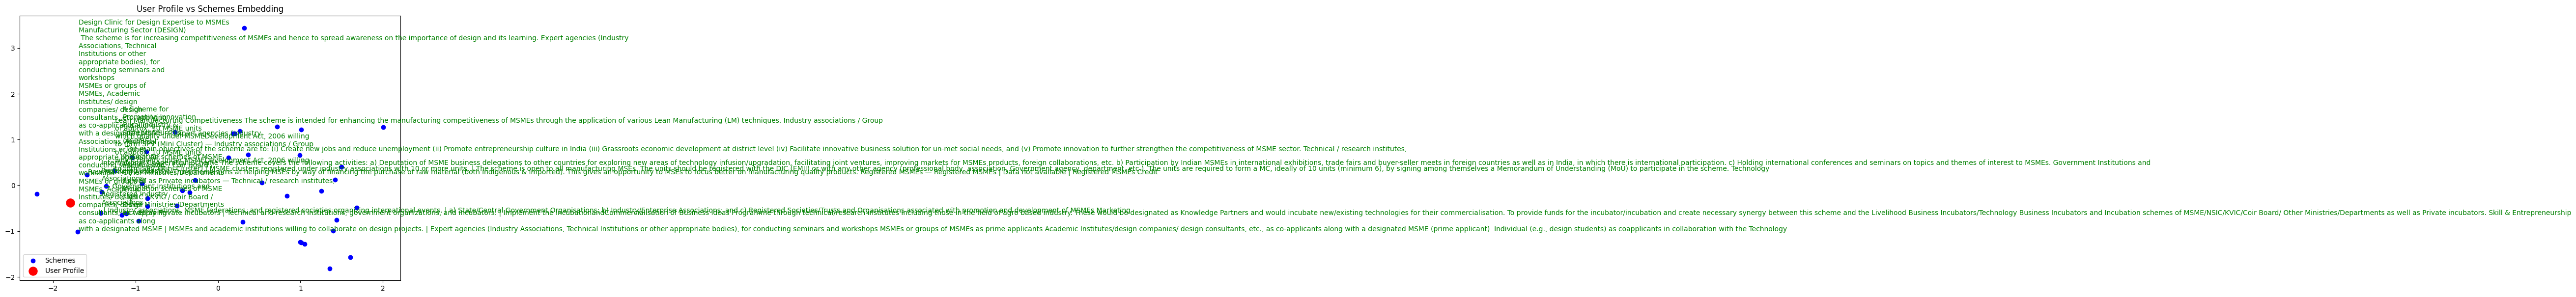

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Combine profile + schemes for PCA
all_emb = np.vstack([profile_emb, emb_schemes])

pca = PCA(n_components=2)
all_2d = pca.fit_transform(all_emb)

profile_2d = all_2d[0:1]          # profile
scheme_2d = all_2d[1:]           # schemes

# Plot
plt.figure(figsize=(10,7))
plt.scatter(scheme_2d[:,0], scheme_2d[:,1], c='blue', label='Schemes')
plt.scatter(profile_2d[:,0], profile_2d[:,1], c='red', label='User Profile', s=150)

# Annotate top recommended schemes
for idx in top_indices:
    plt.annotate(scheme_texts[idx], (scheme_2d[idx,0]+0.01, scheme_2d[idx,1]+0.01), color='green')

plt.title("User Profile vs Schemes Embedding")
plt.legend()
plt.show()

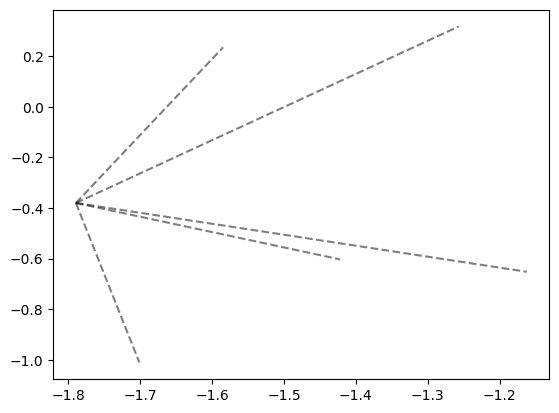

In [ ]:
for idx in top_indices:
    plt.plot([profile_2d[0,0], scheme_2d[idx,0]],
             [profile_2d[0,1], scheme_2d[idx,1]], 'k--', alpha=0.5)

In [ ]:
profiles = [
    "We are a women-led textile MSME based in Maharashtra, producing handloom fabrics.",
    "Software startup in Bangalore focusing on AI applications for SMEs.",
    "Small-scale food processing unit in Uttar Pradesh seeking support for cold storage.",
    "Handicraft enterprise in Rajasthan, looking for export promotion schemes."
]


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode multiple profiles and all schemes
profile_emb = model.encode(profiles, convert_to_tensor=True)
# scheme_emb = model.encode(scheme_texts, convert_to_tensor=True)


In [ ]:
top_k = 3  # show top 3 recommended schemes per profile

for i, profile_text in enumerate(profiles):
    similarities = util.cos_sim(profile_emb[i], emb_schemes)[0]
    top_indices = similarities.argsort(descending=True)[:top_k]

    print(f"\nProfile {i+1}: {profile_text}")
    print("Top Recommended Schemes:")
    for idx in top_indices:
        print(f"- {emb_schemes[idx]} (Score: {similarities[idx]:.2f})")



Profile 1: We are a women-led textile MSME based in Maharashtra, producing handloom fabrics.
Top Recommended Schemes:
- [-6.56381696e-02 -3.67496401e-01 -7.73288608e-02 -1.70266032e-01
 -1.39198944e-01 -1.36804478e-02 -3.49638946e-02 -6.89269751e-02
 -5.48902929e-01  6.44244850e-02 -1.70450702e-01 -2.08536997e-01
  1.22153103e-01  1.27734328e-02 -9.78736877e-02  2.99748063e-01
  4.03058641e-02  3.16578418e-01 -6.28134459e-02  3.17321569e-01
 -1.94312334e-01 -4.89316583e-02  3.65497582e-02 -3.31434608e-01
  9.85992551e-02  1.41302839e-01 -5.57718351e-02 -2.17227057e-01
  2.69510180e-01 -1.04205765e-01  1.33689925e-01 -1.70553420e-02
  1.59560945e-02  4.28117275e-01 -8.33605826e-02  2.12787047e-01
  1.60127908e-01 -4.30092476e-02  1.03318043e-01 -8.78714249e-02
  5.51806055e-02 -1.58814698e-01 -6.74582794e-02 -3.00915539e-01
 -6.18599094e-02 -3.44939470e-01  1.08865954e-01  1.50263146e-01
 -1.37207627e-01 -9.59904678e-03 -4.87522818e-02 -2.18431652e-01
 -6.85704127e-02 -2.60564864e-01 -

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 61623 (\uf0b7) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


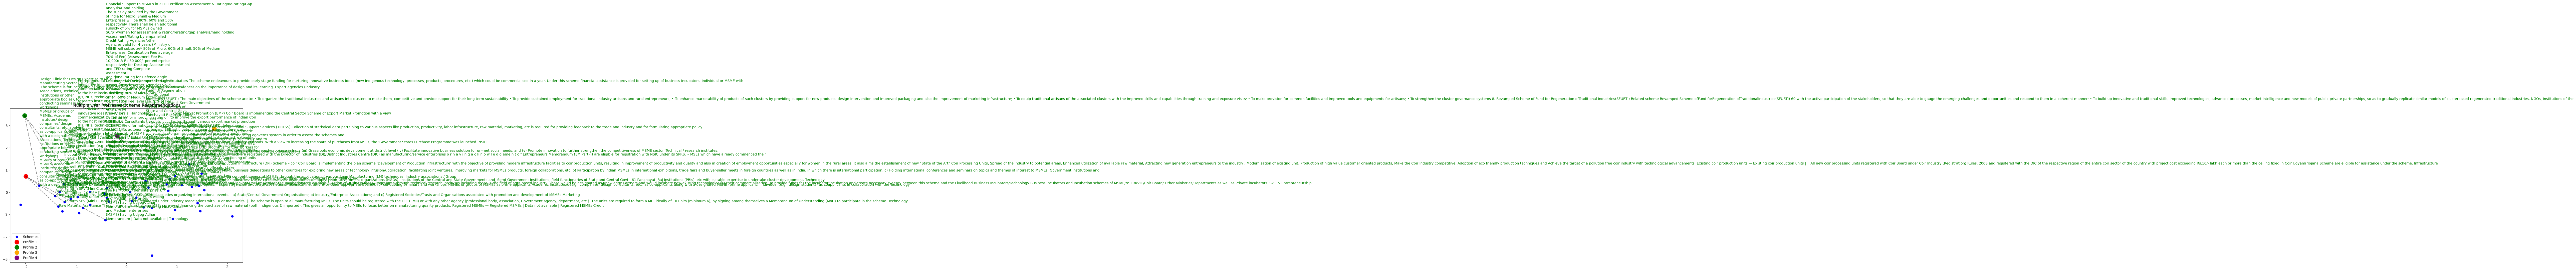

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine all profile embeddings + scheme embeddings
all_emb = np.vstack([profile_emb, emb_schemes])

pca = PCA(n_components=2)
all_2d = pca.fit_transform(all_emb)

profile_2d = all_2d[:len(profiles)]
scheme_2d = all_2d[len(profiles):]

plt.figure(figsize=(12,8))

# Plot schemes
plt.scatter(scheme_2d[:,0], scheme_2d[:,1], c='blue', label='Schemes')

# Plot profiles with different colors
colors = ['red', 'green', 'orange', 'purple']
for i, color in enumerate(colors[:len(profiles)]):
    plt.scatter(profile_2d[i,0], profile_2d[i,1], c=color, s=150, label=f'Profile {i+1}')

# Optionally, annotate top recommended schemes for each profile
for i, profile_vec in enumerate(profile_2d):
    similarities = util.cos_sim(profile_emb[i], emb_schemes)[0]
    top_indices = similarities.argsort(descending=True)[:top_k]
    for idx in top_indices:
        plt.plot([profile_vec[0], scheme_2d[idx,0]], [profile_2d[i,1], scheme_2d[idx,1]], 'k--', alpha=0.5)
        plt.annotate(scheme_texts[idx], (scheme_2d[idx,0]+0.01, scheme_2d[idx,1]+0.01), color='green')


plt.title("Multiple User Profiles vs Scheme Recommendations")
plt.legend()
plt.show()

In [ ]:
sample_profile = {
    "sector": "textile",
    "enterprise_type": "manufacturing",
    "location": "Maharashtra",
    "enterprise_size": "micro",
    "women_led": True
}


In [ ]:
recommended = rule_engine(sample_profile, df)
print("Recommended Schemes:", recommended)

Recommended Schemes: Empty DataFrame
Columns: [Scheme_Name, Description, Type, Who_Can_Apply, Official_Link, similarity]
Index: []



Profile 1: Women-led textile MSME in Maharashtra producing handloom fabrics.
Top Recommended Schemes:
- Raw Material Assistance (Score: 0.48)
- Financial Support to MSMEs in ZED Certification (Score: 0.45)
- Lean Manufacturing Competitiveness (Score: 0.41)

Profile 2: Software startup in Bangalore focusing on AI applications.
Top Recommended Schemes:
- A Scheme for
Promoting Innovation,
Rural Industry &
Entrepreneurship
(ASPIRE)
 (Score: 0.48)
- Design Clinic for Design Expertise to MSMEs
Manufacturing Sector (DESIGN)
 (Score: 0.41)
- Micro Finance
Programme
Performance and
Credit Rating (Score: 0.40)

Profile 3: Small-scale food processing unit in Uttar Pradesh seeking support for cold storage.
Top Recommended Schemes:
- Development of Production Infrastructure (DPI) Scheme – coir (Score: 0.36)
- Single Point Registration (Score: 0.35)
- Science & Technology (S&T) for Coir (Score: 0.32)

Profile 4: Handicraft enterprise in Rajasthan looking for export promotion schemes.
Top Recommend

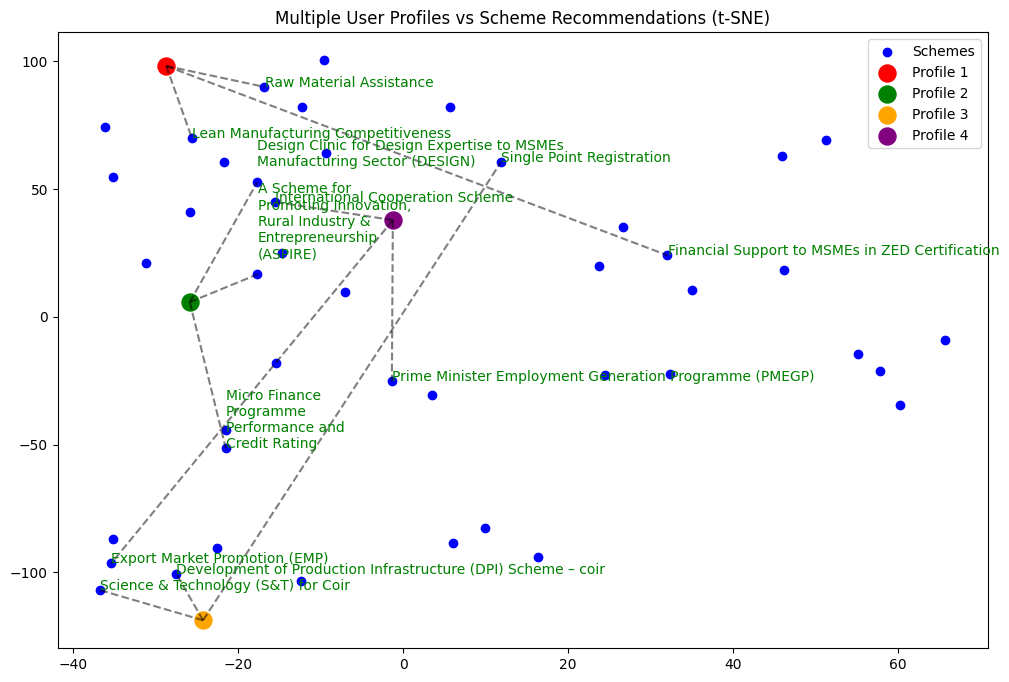

In [ ]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
from sklearn.manifold import TSNE

# 2️⃣ Load scheme dataset
df = pd.read_excel("/content/Cleaned_MSME_Schemes.xlsx")  # replace with your file
scheme_names = df['Scheme_Name'].tolist()
scheme_texts = (df['Description'].fillna('') + " " + df['Who_Can_Apply'].fillna('') + " " + df['Type'].fillna('')).tolist()

# 3️⃣ Define multiple user profiles
profiles = [
    "Women-led textile MSME in Maharashtra producing handloom fabrics.",
    "Software startup in Bangalore focusing on AI applications.",
    "Small-scale food processing unit in Uttar Pradesh seeking support for cold storage.",
    "Handicraft enterprise in Rajasthan looking for export promotion schemes."
]

# 4️⃣ Encode profiles and schemes
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
profile_emb = model.encode(profiles)   # numpy array
scheme_emb = model.encode(scheme_texts) # numpy array

# 5️⃣ Compute top-K recommendations for each profile
top_k = 3
top_schemes_per_profile = []

for i, profile_text in enumerate(profiles):
    similarities = util.cos_sim(profile_emb[i], scheme_emb)[0]
    top_indices = similarities.argsort(descending=True)[:top_k]
    top_schemes_per_profile.append(top_indices)
    print(f"\nProfile {i+1}: {profile_text}")
    print("Top Recommended Schemes:")
    for idx in top_indices:
        print(f"- {scheme_names[idx]} (Score: {similarities[idx]:.2f})")

# 6️⃣ Combine embeddings for t-SNE
all_emb = np.vstack([profile_emb, scheme_emb])

# 7️⃣ Run t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
all_2d = tsne.fit_transform(all_emb)

profile_2d = all_2d[:len(profiles)]
scheme_2d = all_2d[len(profiles):]

# 8️⃣ Plot profiles and schemes
plt.figure(figsize=(12,8))
colors = ['red', 'green', 'orange', 'purple']

# Plot schemes
plt.scatter(scheme_2d[:,0], scheme_2d[:,1], c='blue', label='Schemes')

# Plot profiles
for i, color in enumerate(colors[:len(profiles)]):
    plt.scatter(profile_2d[i,0], profile_2d[i,1], c=color, s=150, label=f'Profile {i+1}')

# Annotate top recommended schemes & draw lines
for i, profile_vec in enumerate(profile_2d):
    top_indices = top_schemes_per_profile[i]
    for idx in top_indices:
        plt.plot([profile_vec[0], scheme_2d[idx,0]], [profile_vec[1], scheme_2d[idx,1]], 'k--', alpha=0.5)
        plt.annotate(scheme_names[idx], (scheme_2d[idx,0]+0.01, scheme_2d[idx,1]+0.01), color='green')

plt.title("Multiple User Profiles vs Scheme Recommendations (t-SNE)")
plt.legend()
plt.show()

In [ ]:
import pickle
from sentence_transformers import SentenceTransformer, util
import numpy as np
import json

class SchemeRecommender:
    def __init__(self, scheme_names, scheme_texts, rule_file=None, model_name='paraphrase-MiniLM-L6-v2'):
        self.scheme_names = scheme_names
        self.scheme_texts = scheme_texts
        self.model_name = model_name
        self.model = SentenceTransformer(model_name)
        self.scheme_emb = self.model.encode(scheme_texts)

        # Load rules if provided
        if rule_file:
            with open(rule_file, 'r') as f:
                self.rules = json.load(f)
        else:
            self.rules = []

    def recommend(self, profile_text, top_k=5):
        # Rule-based recommendations
        rule_based = []
        for rule in self.rules:
            if all(cond.lower() in profile_text.lower() for cond in rule['conditions']):
                rule_based.append(rule['scheme'])

        # Embedding-based recommendations
        profile_emb = self.model.encode([profile_text])
        similarities = util.cos_sim(profile_emb, self.scheme_emb)[0]
        top_indices = similarities.argsort(descending=True)[:top_k]
        semantic_recs = [self.scheme_names[i] for i in top_indices]

        # Combine and remove duplicates
        final_recs = list(dict.fromkeys(rule_based + semantic_recs))
        return final_recs


In [ ]:
import pickle

# Create recommender object
recommender = SchemeRecommender(scheme_names, scheme_texts, rule_file='rules.json')

# Save to pickle
with open('scheme_recommender.pkl', 'wb') as f:
    pickle.dump(recommender, f)


FileNotFoundError: [Errno 2] No such file or directory: 'rules.json'